# Phase 3 Code Challenge Review

Made using resources from the Seattle team - thanks y'all.

## Overview

* Gradient Descent
* Logistic Regression
* Classification Metrics
* Decision Trees

In [60]:
# Imports
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_auc_score, plot_roc_curve
from sklearn.tree import export_graphviz


In [61]:
# from src.call import call_on_students

## Part 1: Gradient Descent

### Set Up

In [62]:
# Grab the data from 'auto-mpg.csv'
mpg_df = pd.read_csv("data/auto-mpg.csv")

In [63]:
# Explore the data
mpg_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


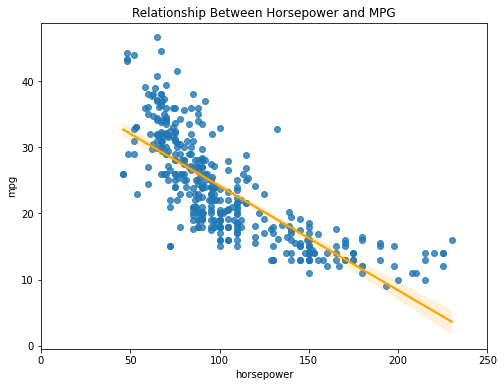

In [64]:
# Let's plot a simple linear regression line using just the horsepower column
plt.figure(figsize=(8, 6))
sns.regplot(x='horsepower', y='mpg', data=mpg_df, line_kws={"color":"orange"})
plt.title('Relationship Between Horsepower and MPG')
plt.xlim(0, 250)
plt.show()

The above graph shows an approximate best fit line for the relationship between `horsepower` and `mpg` in our data.


### 1) Describe the below chart: What is it showing? What does it tell us?

![Slope-RSS relationship image](images/slope-rss-relationship.png)

In [65]:
# call_on_students(1)

#### Answer: 

- 


### 2) Imagine that you're starting at a slope towards the top upper left corner. Using Zoom's annotate feature, demonstrate how gradient descent would work 

In [66]:
# call_on_students(1)

### 3) What is a step size when talking about gradient descent? How does learning rate regulate step size?

In [67]:
# call_on_students(1) hyperperam is alpha = learning rate 
#step size is learning rate * gradient 

#### Answer: 

- 


## Part 2: Logistic Regression

### 4) Describe a logistic regression model:

- What kind of target is a logistic regression model used for?
- What are the predictions that a logistic regression model outputs?
- How is it different from linear regression?
- Is it a parametric or non-parametric model?

In [68]:
# call_on_students(1)
#classification
# returns probability of class given features
#lin reg gives u a value of target vs just a probability
#only non parametric are k nearest and decision trees

#### Answer: 

- 


### 5) Compare a logistic regression model to any of the other model types we've learned:

- List one benefit of logistic regression when compared to the other model type
- List one reason the other model type might be more useful

In [69]:
# call_on_students(1)

#### Answer: 

- 


## Part 3: Logistic Regression and Classification Metrics with Code

### Set Up

In [70]:
# Let's use the same data, but now with a classification target
mpg_class = pd.read_csv('data/auto-mpg-classification.csv')

In [71]:
# Check this new dataframe out
mpg_class.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin,target
0,8,307.0,130,3504,12.0,70,1,0
1,8,350.0,165,3693,11.5,70,1,1
2,8,318.0,150,3436,11.0,70,1,0
3,8,304.0,150,3433,12.0,70,1,1
4,8,302.0,140,3449,10.5,70,1,1


### 6) Prepare our data for modeling:

1. Perform a train/test split
2. Scale the inputs


In [72]:
# call_on_students(1)

In [73]:
# Train-test split
# Set test_size=0.33 and random_state=42
X= mpg_class.drop(columns=['target'])
y=mpg_class['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


In [74]:
# Scale the data
scale = StandardScaler()
X_train_scaled = scale.fit_transform(X_train)
X_test_scaled = scale.transform(X_test)

### 7) Explore the `target` column and our model-less baseline

1. What is the breakdown of the `target` column in our training data?
2. What would a model-less baseline look like in this context?
3. How accurate would that model-less understanding be on our test data?

In [75]:
# call_on_students(1)


#### Part 1: explore the target column breakdown in train data

In [78]:
# Code to explore
y_train.unique()
y_train.value_counts()

0    221
1     73
Name: target, dtype: int64

#### Answer:

- 


#### Part 2: What would a model-less baseline look like in this context?

#### Answer:

- 


In [79]:
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier()
dummy_clf.fit(X_train_scaled, y_train)


c:\Users\Archi\anaconda3\envs\learn-env\lib\site-packages\sklearn\dummy.py:131: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  warnings.warn("The default value of strategy will change from "


DummyClassifier()

#### Part 3: How accurate would that baseline be on test data?


In [80]:
# Code to find the answer
dummy_clf.predict(X_test_scaled)

array([0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0], dtype=int64)

#### Answer:

- 


### 8) What is one problem you could foresee based on this breakdown, and what is one strategy you could employ to address that problem?

In [81]:
# call_on_students(1)  Use the features!

#### Answer:

- 


### 9) Fit a logistic regression model, and plot a confusion matrix of the results on our test set

In [82]:
# call_on_students(1)

In [93]:
# Fit a logistic regression model
# Name the model `logreg` and set random_state = 42
logreg = LogisticRegression(random_state = 42)
logreg.fit(X_train_scaled, y_train)
y_pred = logreg.predict(X_test_scaled)

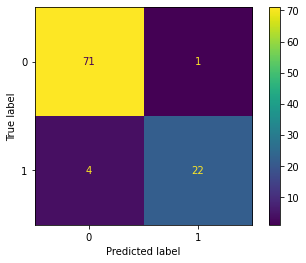

In [104]:
# Plot a confusion matrix on the test data
plot_confusion_matrix(logreg, X_test_scaled, y_test)
plt.show()

### 10) Calculate the accuracy, precision, recall and f1-score for the test set

You can use the confusion matrix above, or sklearn functions

In [95]:
# call_on_students(1)

In [96]:
# Accuracy


In [97]:
# Precision


In [98]:
# Recall


In [99]:
# F1-Score


### 11) Calculate the ROC-AUC on the test set, and plot the ROC curve

For this you'll definitely want to use the sklearn functions!

In [100]:
# call_on_students(1)

In [101]:
# Calculate roc-auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve


In [102]:
# Plot the ROC curve
y_hat = logreg.predict_proba(X_test_scaled)[:,1]

roc_auc_score(y_test, y_hat)


0.9909188034188035

### 12) Evaluate! Based on the metrics of our test data, how is our model doing?

In [103]:
# call_on_students(1)
y_prob

NameError: name 'y_prob' is not defined

#### Answer:

- 


## Part 4: Decision Trees

### Set Up

NOTE! This code might not work for you! The images these generate are already prepopulated below because of that.

In [ ]:
# Helper function from a colleague (h/t Bryan)
def plot_tree(dt, used_cols, out_file='mytree.dot'):
    export_graphviz(dt, out_file=out_file, 
                    filled=True, feature_names=used_cols, 
                    leaves_parallel=True, node_ids=True)
    with open(out_file) as f:
        dot_graph = f.read()
    return graphviz.Source(dot_graph)

In [ ]:
# Creating two different decision trees with a single split
dt_maxdepth1_v1 = DecisionTreeClassifier(max_depth=1, random_state = 42)
dt_maxdepth1_v2 = DecisionTreeClassifier(max_depth=1, random_state = 42)

# Training the two trees on different columns
dt_maxdepth1_v1.fit(X_train[['weight']], y_train)
dt_maxdepth1_v2.fit(X_train[['origin']], y_train)

In [ ]:
# Tree based on 1st column
plot_tree(dt_maxdepth1_v1, ['weight'])

In [ ]:
# Tree based on 2nd column
plot_tree(dt_maxdepth1_v2, ['origin'])

#### Images:

| Version 1: Weight | Version 2: Origin |
| ----------------- | ----------------- |  
| ![max depth 1 - version 1](images/dt-maxdepth1-v1.png) | ![max depth 1 - version 2](images/dt-maxdepth1-v2.png) |

### 13) Which of these trees does a better job splitting the data? How can you tell?

In [ ]:
# call_on_students(1)
parent_impurity = .381
weight1 = 196/262
weight2 = 66/262

weighted_impurity = weight1*.088 + weight2*.213
weighted_impurity

0.1194885496183206

In [ ]:
information_gain1 = parent_impurity - weighted_impurity
information_gain1

0.2615114503816794

In [ ]:
tree2_w1 = 170/262
tree2_w2 = 92/262

weighted_impurity2 = tree2_w1*.475 + tree2_w2*.022
weighted_impurity2


information_gain2 = parent_impurity - weighted_impurity2
information_gain2

0.06506870229007639

#### Answer:

- 


In [ ]:
#first one is better because higher information gain

### 14) Fit a decision tree model, and plot a confusion matrix of the results on our test set

In [ ]:
# call_on_students(1)

In [ ]:
# Fit a decision tree model
# Name the model `dt` and set random_state = 42
dt = DecisionTreeClassifier(random_state= 42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

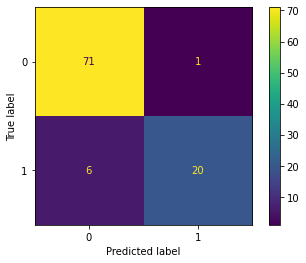

In [ ]:
# Plot a confusion matrix on the test data
plot_confusion_matrix(dt, X_test, y_test)

NameError: name 'logreg' is not defined

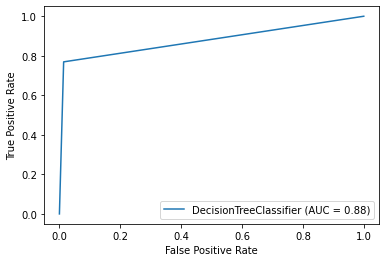

In [ ]:
# Code to visualize the ROC curves for the models we've done
fig, ax = plt.subplots()
plot_roc_curve(dt, X_test, y_test, ax=ax)
plot_roc_curve(logreg, X_test_scaled, y_test, ax=ax)

plt.title("Receiver Operating Characteristic Curves\n(Evaluated on Test Set)")
plt.show()

### 15) Which is the better model according to ROC-AUC score? How can you tell?

In [ ]:
# call_on_students(1)
#logreg

#### Answer:

- 
